In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [3]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
#here we combine the data and labels together to get 1 dataframe to work with

combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
# The 40th column is the damage_grade
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
# Here we take out only the age from the combined datafram to see the distribution of the age across all the buildings affected

ageData=combined_data['age']

# <font color='mediumblue'>1st assumption: Maybe age of the building may have an impact on the damage grade?</font>

### Distibution of the age of the buildings

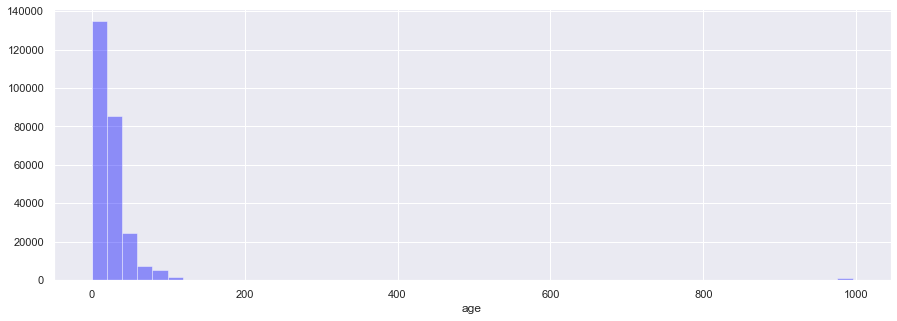

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

#### It can be seen that the most of the building's age is in range of 0 to 100



### Distribution of the damage levels

In [8]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


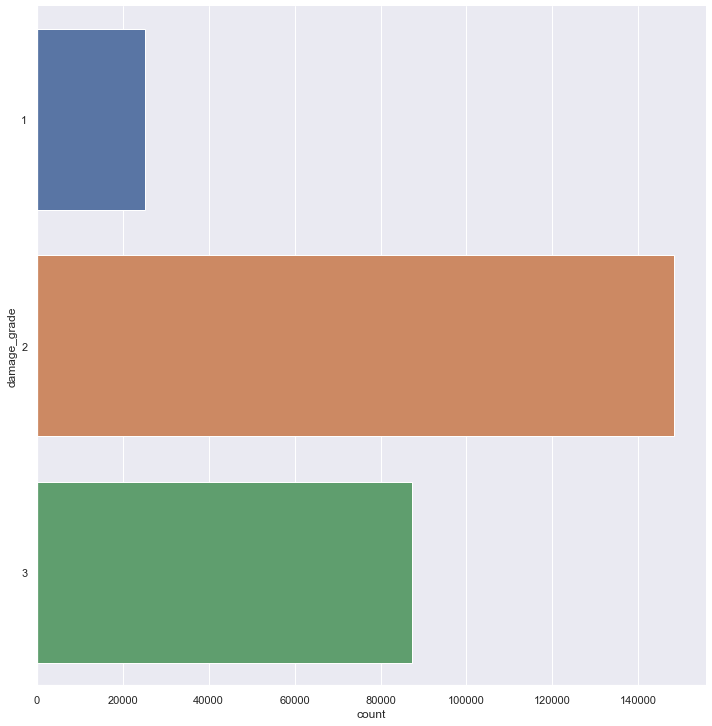

In [9]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=7)

#### It can be seen most building has a damage level of 2

## Plotting damage vs age

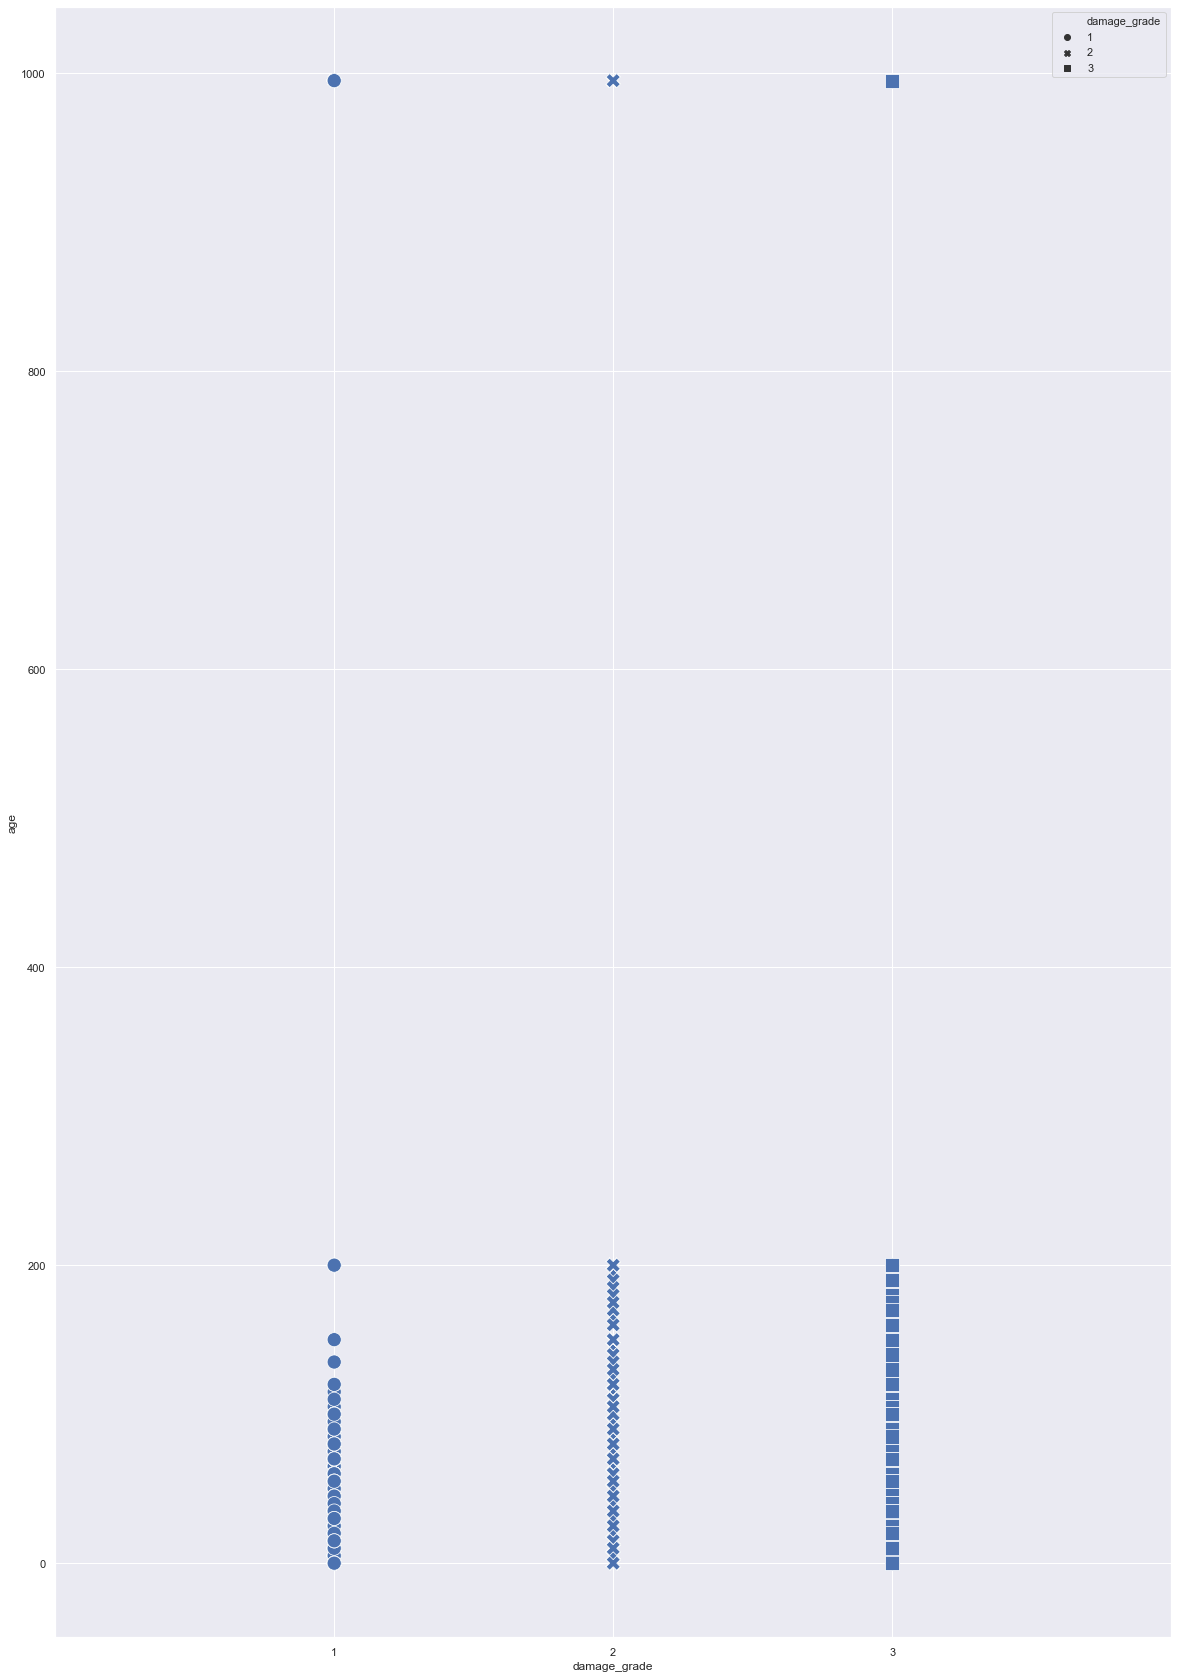

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()


#https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

#### Usually we will assume that the older the age, the higher the damage it will take. Here we can see that the damage grade is almost equally spread out over the age of the building.

## <font color='tomato'> Conclusion: Age of building does not have an effect on the damage grade </font>

In [11]:
#https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# <font color='mediumblue'>2nd assumption: Maybe plan configuration of the building may have an impact on the damage grade?</font>

### Plotting the number of buildings damaged against different plan configuration

Text(0.5, 1.0, 'Which plan configuration contributed to most damage? \n\n')

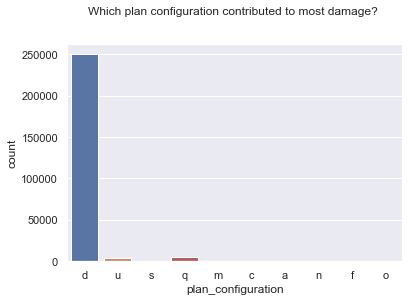

In [12]:
ax = sb.countplot(x="plan_configuration", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage? \n\n")

#### Plan d contributed to most damage to builings
#### Plan q and Plan u was the next 2 highest contributer to damage compared to other plan configurations

Text(0.5, 1.0, 'How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n')

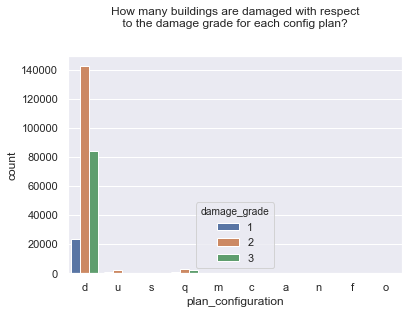

In [13]:
ax = sb.countplot(x="plan_configuration", hue= "damage_grade", data=combined_data)
ax.set_title("How many buildings are damaged with respect\n to the damage grade for each config plan? \n\n")

## Sorting each config plan to 1 dataframe each

In [14]:
# We take out the plan config out from the combined data and make it into 1 df
# The above mentioned is used for looping only
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

In [15]:
# Empty lists for each plan configuration
aPlan= []
cPlan= []
dPlan= []
fPlan= []
mPlan= []
nPlan= []
oPlan= []
qPlan= []
sPlan= []
uPlan= []

# Here we add to the list accoridingly, with reference from the combined_data
for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'a'):
        aPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'c'):
        cPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'd'):
        dPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'f'):
        fPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'm'):
        mPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'n'):
        nPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'o'):
        oPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'q'):
        qPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 's'):
        sPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'u'):
        uPlan.append(combined_data.iloc[x])

In [16]:
# convert all the lists into dataframes
aPlanDf= pd.DataFrame(aPlan)
cPlanDf= pd.DataFrame(cPlan)
dPlanDf= pd.DataFrame(dPlan)
fPlanDf= pd.DataFrame(fPlan)
mPlanDf= pd.DataFrame(mPlan)
nPlanDf= pd.DataFrame(nPlan)
oPlanDf= pd.DataFrame(oPlan)
qPlanDf= pd.DataFrame(qPlan)
sPlanDf= pd.DataFrame(sPlan)
uPlanDf= pd.DataFrame(uPlan)

#https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

In [17]:
print("Number of buildings damaged in each configuration plan")
print("Plan Configuration A: ",len(aPlanDf))
print("Plan Configuration C: ",len(cPlanDf))
print("Plan Configuration D: ",len(dPlanDf))
print("Plan Configuration F: ",len(fPlanDf))
print("Plan Configuration M: ",len(mPlanDf))
print("Plan Configuration N: ",len(nPlanDf))
print("Plan Configuration O: ",len(oPlanDf))
print("Plan Configuration Q: ",len(qPlanDf))
print("Plan Configuration S: ",len(sPlanDf))
print("Plan Configuration U: ",len(uPlanDf))

print("\n\n Sum of all the plans: ",len(aPlanDf+cPlanDf+dPlanDf
                                        +fPlanDf+mPlanDf+nPlanDf
                                        +oPlanDf+qPlanDf+sPlanDf+uPlanDf))

Number of buildings damaged in each configuration plan
Plan Configuration A:  252
Plan Configuration C:  325
Plan Configuration D:  250072
Plan Configuration F:  22
Plan Configuration M:  46
Plan Configuration N:  38
Plan Configuration O:  159
Plan Configuration Q:  5692
Plan Configuration S:  346
Plan Configuration U:  3649


 Sum of all the plans:  260601


#### The "Number of buildings damaged in each configuration plan" is shown in the plot above titled "Which plan configuration contributed to most damage?"

## Separating the 3 different damage grades into 1 dataframe each

In [18]:
# We take out the damage grade out from the combined data and make it into 1 df
# The above mentioned is used for looping only
damageGradeDf = combined_data['damage_grade']
damageGradeDf.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [19]:
# Empty lists for each damage grade
damage_grade_1= []
damage_grade_2= []
damage_grade_3= []

# Here we add to the list accoridingly, with reference from the combined_data
for x in range(0,len(combined_data)):
    if(damageGradeDf.iloc[x] == 1):
        damage_grade_1.append(combined_data.iloc[x])
    if(damageGradeDf.iloc[x] == 2):
        damage_grade_2.append(combined_data.iloc[x])
    if(damageGradeDf.iloc[x] == 3):
        damage_grade_3.append(combined_data.iloc[x])

In [20]:
# convert all the lists into dataframes
damage_grade_1_Df= pd.DataFrame(damage_grade_1)
damage_grade_2_Df= pd.DataFrame(damage_grade_2)
damage_grade_3_Df= pd.DataFrame(damage_grade_3)

In [22]:
print("Number of buildings damaged in each damage grade")
print("Damage Grade 1: ",len(damage_grade_1_Df))
print("Damage Grade 2: ",len(damage_grade_2_Df))
print("Damage Grade 2: ",len(damage_grade_3_Df))

print("\n\n Sum of all the damage grades: ",len(damage_grade_1_Df+damage_grade_2_Df+damage_grade_3_Df))

Number of buildings damaged in each damage grade
Damage Grade 1:  25124
Damage Grade 2:  148259
Damage Grade 2:  87218


 Sum of all the damage grades:  260601


## Plotting number of buildings damaged for each config plans for each damage level

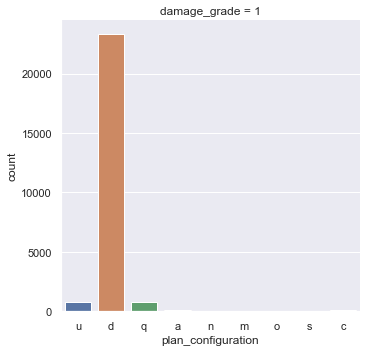

In [23]:
sb.catplot(x = "plan_configuration", data = damage_grade_1_Df, kind = "count",height=5, col ="damage_grade")

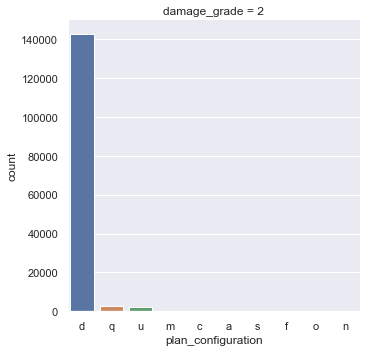

In [24]:
sb.catplot(x = "plan_configuration", data = damage_grade_2_Df, kind = "count",height=5,col ="damage_grade")

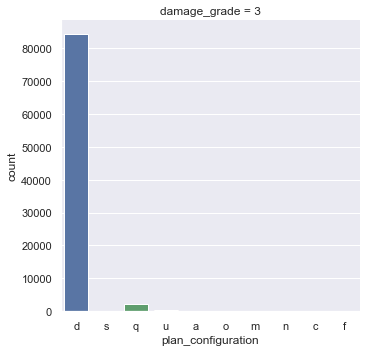

In [25]:
sb.catplot(x = "plan_configuration", data = damage_grade_3_Df, kind = "count",height=5,col ="damage_grade")

#### The above show for each damage grade, buildings with plan d has contributed the most 

## Plotting the area and height percentage against the config plans

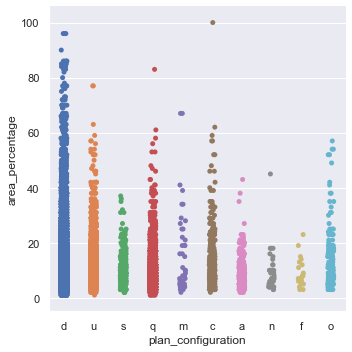

In [26]:
sb.catplot(x="plan_configuration", y = "area_percentage", data=combined_data)

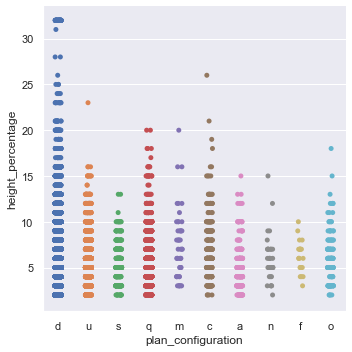

In [27]:
sb.catplot(x="plan_configuration", y = "height_percentage", data=combined_data)

## Plotting area vs height against damage for each config plan

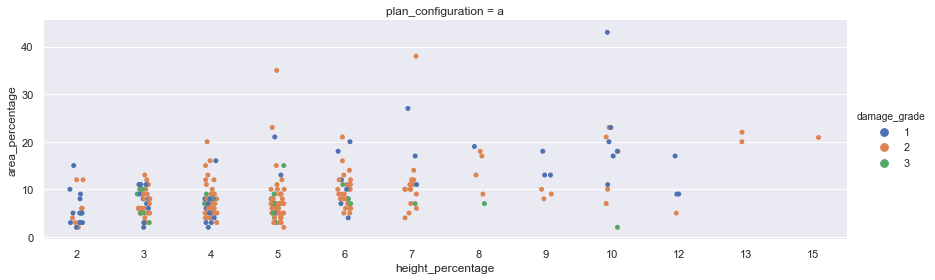

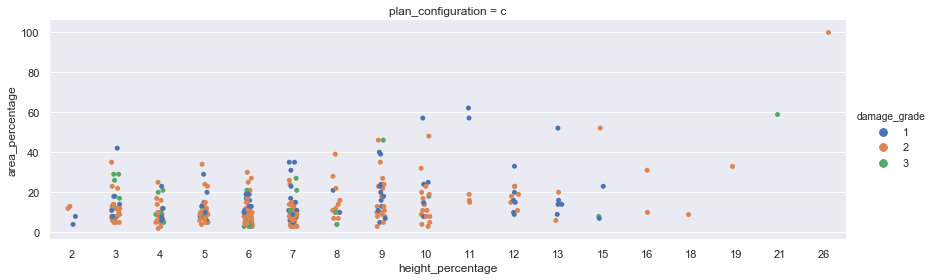

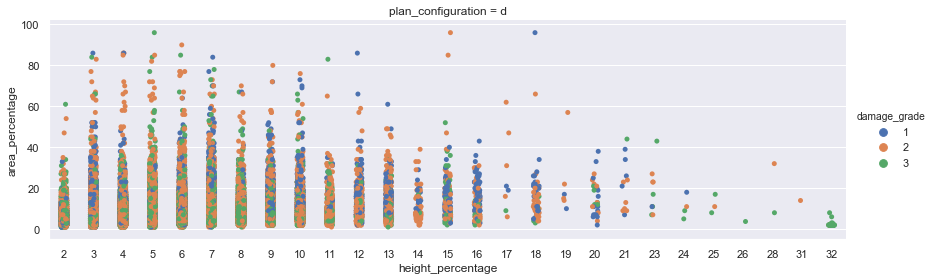

In [28]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=aPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=cPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=dPlanDf, height=4, aspect=3, col="plan_configuration")

#https://stackoverflow.com/questions/51826447/how-to-resize-a-catplot-of-kind-swarm-in-seaborn-without-generating-a-second-p

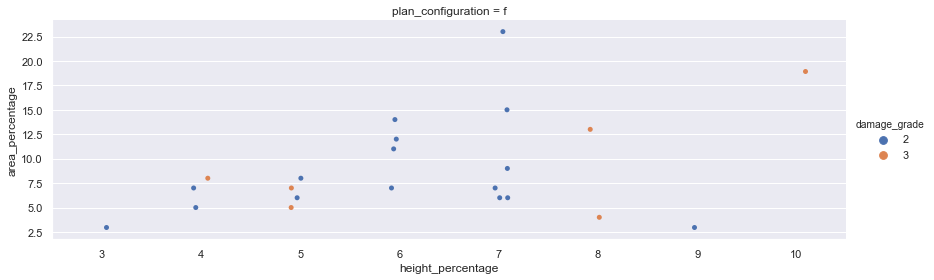

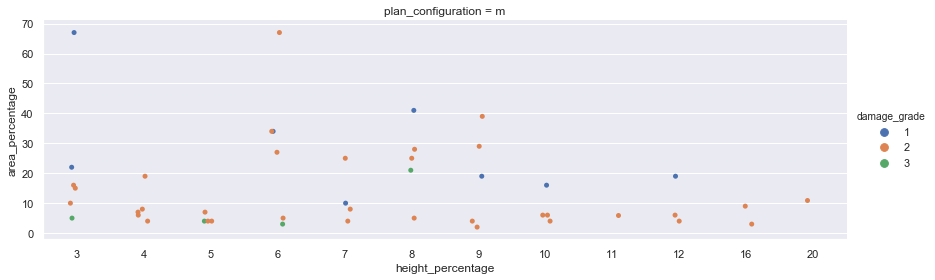

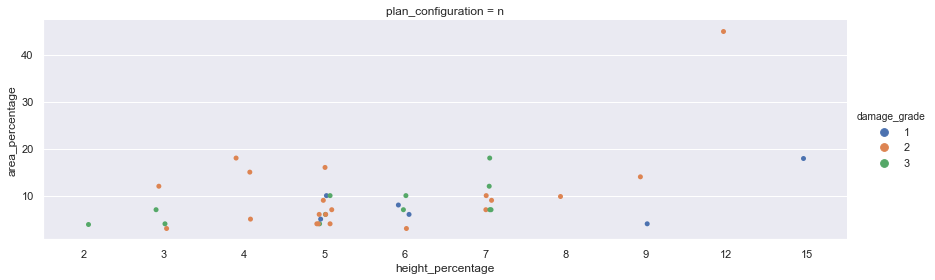

In [29]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=fPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=mPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=nPlanDf, height=4, aspect=3, col="plan_configuration")

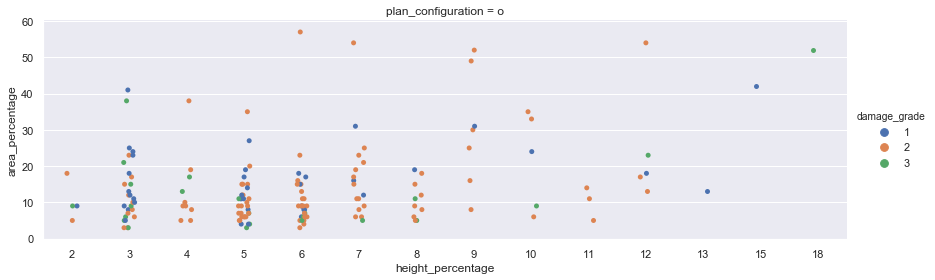

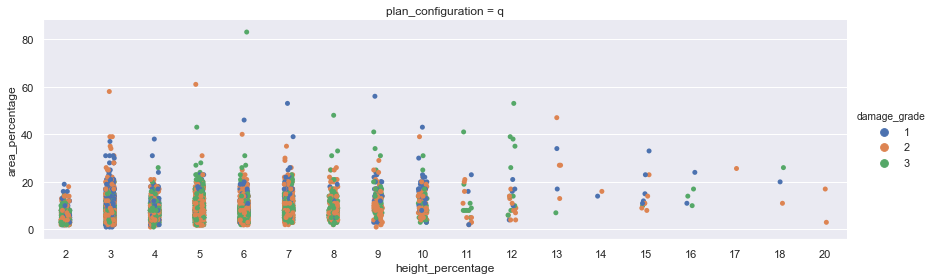

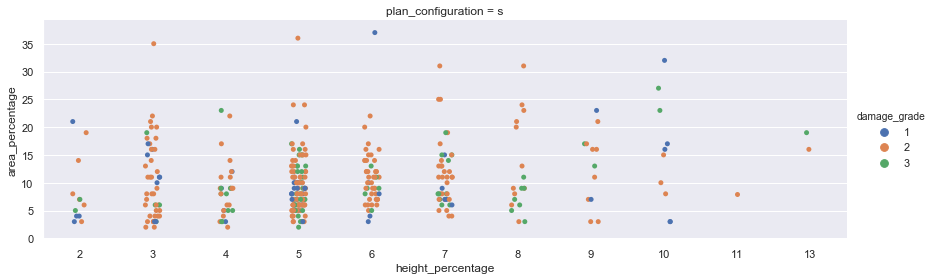

In [30]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=oPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=qPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=sPlanDf, height=4, aspect=3, col="plan_configuration")

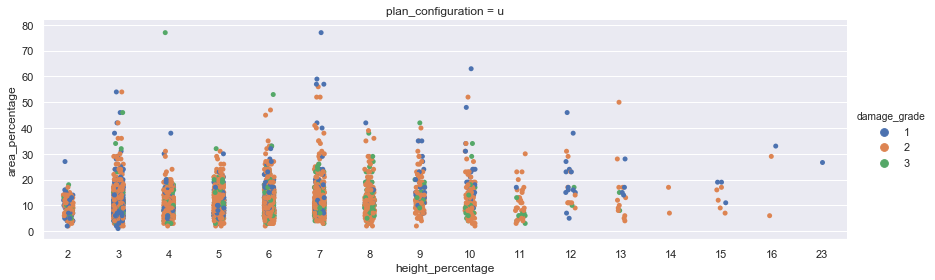

In [31]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=uPlanDf, height=4, aspect=3, col="plan_configuration")

In [ ]:
# Attempt classification from building construction type to damage 
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
predict_data = combined_data
process_predict_data = pd.get_dummies(data=predict_data, drop_first=True)

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [ ]:
process_predict_data.head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
process_predict_data = pd.get_dummies(data=combined_data, drop_first=True)
train, test = train_test_split(process_predict_data, test_size=0.20, random_state=0)
x_train = train.drop(['damage_grade'], axis=1)
y_train= train['damage_grade']
x_test =  test.drop(['damage_grade'], axis=1)
y_test= test['damage_grade']
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(x_train, y_train)
score = dectree.score(x_test, y_test)
print(score)
score = dectree.score(x_train, y_train)
print(score)